<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/3_6_df_heatmaps_PM_MZM_analise_N_15_Ax_5_5_a_17_FIG_3_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tamanho de amostras do df 27377


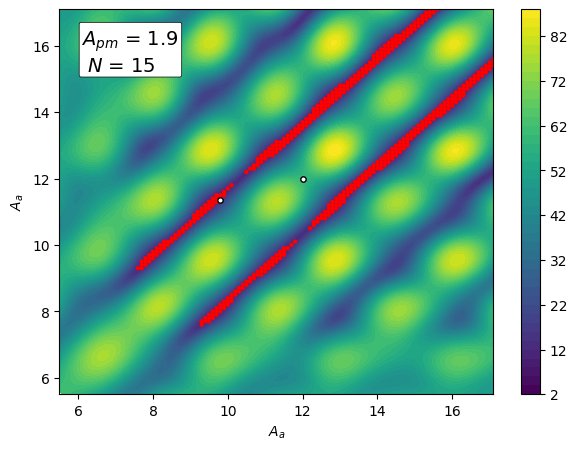

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator, AutoLocator, ScalarFormatter



# USADO PARA PM-MZM  PM-MZ1-MZ2 E PM1-MZ1-MZ2-MZ3
# dados gerado para Apm = 1.9, Aa, Ab  = 5.5 a 17 quando N = 15 linhs foram comparadas
url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_3_3_2_all_values_PM_MZM_N_15_Apm_1.9_Ax_5.5_a_17.csv'

dfN15 = pd.read_csv(url_n15)
print('tamanho de amostras do df', len(dfN15))

# Valores específicos
Apm_value = 1.9
CV = 13  # Substitua 'valor_especifico_CV' limite superior FR
# Filtrar dados para o valor específico de Apm
# Dando nomenas colunas

# Configurações de estilo
tk_sz = 14  # Tamanho dos ticks nos eixos
ax_lb_sz = 16  # Tamanho das labels dos eixos
ann_tx_sz = 14  # Tamanho do texto da anotação
an_bg_cl = 'white'  # Cor de fundo da anotação


dfN15.shape

#              nv,  iApm, iAa, iAb, CV,  AV, flat, CVmin, a1,a2,a3
dfN15.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K','L']
subset = dfN15[dfN15['B'] == Apm_value]

# Cria uma grade regular de pontos
c_unique = np.linspace(subset['C'].min(), subset['C'].max(), len(subset['C'].unique()))
d_unique = np.linspace(subset['D'].min(), subset['D'].max(), len(subset['D'].unique()))
c_grid, d_grid = np.meshgrid(c_unique, d_unique)

# Interpola os valores de 'E' para a grade criada
e_grid = griddata((subset['C'], subset['D']), subset['E'], (c_grid, d_grid), method='cubic')

# Cria o gráfico de contorno
plt.figure(figsize=(7, 5))
contour = plt.contourf(c_grid, d_grid, e_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
#plt.title(f'Mapa de Calor para Apm = {Apm_value}')
plt.xlabel('$A_a$')
plt.ylabel('$A_a$')

# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] < CV]
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', label=f'E < {CV}')
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', s=20, edgecolors='black', label=f'E < {CV}')  # 's' é o tamanho do marcador
plt.scatter(low_e_points['C'], low_e_points['D'], color='red', s=10, edgecolors='none', label=f'E <= {CV}')  # Sem bordas nos marcadores

plt.annotate(f'$A_{{pm}}$ = {Apm_value} \n $N$ = 15', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=ann_tx_sz,
              backgroundcolor=an_bg_cl, ha='left', va='top',
              bbox=dict(boxstyle="round,pad=0.1", edgecolor='black', linewidth=0.5, facecolor='white'))


Aa1 = 12; Ab1 = 12
Aa2 = 9.78; Ab2 = 11.35
# Marcar o ponto (4,5)
plt.scatter(Aa1, Ab1, color='white', s=15, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa2, Ab2, color='white', s=15, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador

# Adicionando legenda
#plt.legend()

plt.show()




Numero de dados low_e_points 456
AV min = 0.46
AV min = 1.98


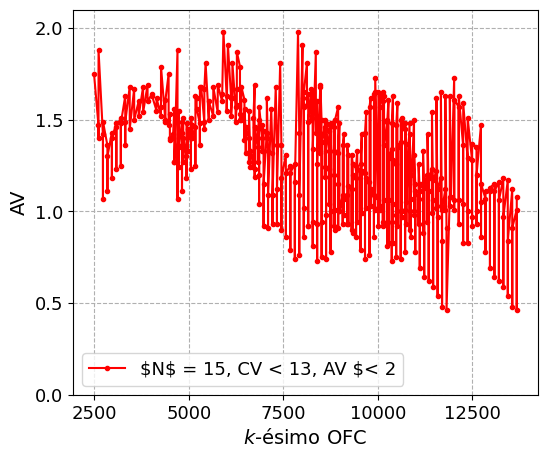

In [ ]:
# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] < CV]
print('Numero de dados low_e_points',len(low_e_points))
AV = low_e_points ['F']

# Calcular o valor mínimo de cada coluna
min_va = AV.min()
max_va = AV.max()
print('AV min =', min_va)
print('AV min =', max_va)


fig, ax = plt.subplots(figsize=(6,5))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados
ax.plot(AV,'r.-', label='$N$ = 15, CV < 13, AV $< 2')
# Configurando os limites dos eixos
#ax.set_xlim(-10, 165400)  # Limites para o eixo x
ax.set_ylim(0, 2.1) # Limites para o eixo y --------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel("AV", fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc='lower left', fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico

In [ ]:
# ENCONTRAR EQUIVALENCIA CV A AV
df = dfN15

# Variável M com valores de 1 a 20 em incrementos de 0.5
M = np.arange(3, 17, 0.1)

# Listas para armazenar os resultados
m_values = []
e_values = []
f_values = []

# Iterar sobre os valores de M
for m_value in M:
    # Filtrar o DataFrame para obter linhas onde E é menor que o valor atual de M
    filtered_df = df[df['E'] <= m_value]

    if not filtered_df.empty:
        # Encontrar o máximo valor de F no DataFrame filtrado
        max_f_value = filtered_df['F'].max()

        # Encontrar o valor correspondente de E para o máximo valor de F
        corresponding_e_value = filtered_df.loc[filtered_df['F'] == max_f_value, 'E'].values[0]

        # Adicionar os valores às listas
        m_values.append(m_value)
        e_values.append(round(corresponding_e_value,2))
        f_values.append(max_f_value)
    else:
        # Caso o DataFrame filtrado esteja vazio
        m_values.append(m_value)
        e_values.append(None)
        f_values.append(None)

# Criar um novo DataFrame com os resultados
results_df = pd.DataFrame({
    'M': m_values,
    'E': e_values,
    'F': f_values
})

# Exibir a tabela
#print(results_df)

# Remover as linhas repetidas, mantendo apenas a última ocorrência
df_unique = results_df.drop_duplicates(subset=['E', 'F'], keep='last')

print(df_unique)
# Salvar o DataFrame em um arquivo Excel
df_unique.to_excel('output_Apm_1_9_Aa_Ab_N15.xlsx', index=False)

        M      E     F
4     3.4    NaN   NaN
5     3.5   3.50  0.48
8     3.8   3.59  0.54
12    4.2   3.87  0.59
18    4.8   4.30  0.62
23    5.3   4.81  0.64
26    5.6   5.37  0.69
27    5.7   5.62  0.73
28    5.8   5.77  0.81
30    6.0   5.86  0.90
34    6.4   6.08  0.93
38    6.8   6.48  0.93
44    7.4   6.87  1.02
45    7.5   7.46  1.03
50    8.0   7.56  1.09
51    8.1   8.01  1.11
53    8.3   8.18  1.16
55    8.5   8.38  1.18
56    8.6   8.59  1.20
57    8.7   8.67  1.23
59    8.9   8.79  1.23
61    9.1   8.92  1.26
66    9.6   9.12  1.38
69    9.9   9.69  1.40
70   10.0   9.97  1.45
75   10.5  10.08  1.51
78   10.8  10.55  1.57
85   11.5  10.80  1.67
89   11.9  11.53  1.81
91   12.1  11.97  1.88
97   12.7  12.19  1.91
100  13.0  12.72  1.98
105  13.5  13.08  2.00
106  13.6  13.58  2.02
107  13.7  13.66  2.03
121  15.1  13.80  2.25
122  15.2  15.12  2.27
127  15.7  15.29  2.34
139  16.9  15.80  2.60
